<a href="https://colab.research.google.com/github/calvinadoho/Projet-ML-TNT/blob/main/Evaluation_Mod%C3%A8les.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/gdrive')
os.listdir("/gdrive/MyDrive/Dossier TNT")

Mounted at /gdrive


['Base_équilibrée.csv',
 'Base_finale_CTGAN.csv',
 'Base_de_données_outliers.csv',
 'Base_filtrée_univariée.csv',
 'Data_standardisé.csv',
 'Data_Analyse_bivariee.csv',
 'Data_PCA.csv',
 'Donnees_train.csv',
 'Donnees_test.csv',
 'Comparaison_meilleurs_modeles.csv',
 'Classement_modeles_par_metrique.csv',
 'Base_Complete_TNT.xlsx',
 'Data_remplies.csv',
 'data_encoded.csv',
 'Base_de_données_outliers.gsheet']

In [ ]:
Data=pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_train.csv")
Data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,E_field
0,-3.113162,1.415313,-0.388425,-1.370663,1.062810,1.193176,0.539836,-0.109614
1,-4.135646,-0.545224,0.562650,0.270350,0.587757,0.633695,0.693534,-0.742849
2,-3.642039,-0.162372,0.937110,-0.901799,-0.810002,-0.457676,-0.455646,-1.505883
3,3.061175,-1.702733,-0.620719,-0.926748,0.671890,-0.289139,-0.264099,0.721187
4,-3.853962,-0.993527,1.118542,0.073773,-0.947819,-0.751912,-0.621495,-1.508791
...,...,...,...,...,...,...,...,...
10769,3.555866,-1.161795,-0.531856,-1.222596,-0.159316,0.596879,-0.339145,0.805381
10770,-3.302475,0.920241,0.678190,-1.669039,0.521694,0.579270,-0.499947,-0.320733
10771,2.977579,0.377418,0.566270,0.737409,-0.256007,0.033062,0.185662,0.694814
10772,3.256178,0.966646,0.504973,-0.092640,0.038567,-0.139361,-0.150373,0.972603


**Régression Linéaire**

Résultats moyens Régression Linéaire :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.990043   0.099260  0.990314    0.098219
1          1000  0.989886   0.099630  0.990412    0.098648
2          1500  0.990032   0.099829  0.989989    0.099796
3          2000  0.990542   0.096967  0.990163    0.098969
4          2500  0.989950   0.099139  0.990256    0.098451
5          3000  0.989990   0.099012  0.990032    0.099183
6          3500  0.990124   0.099082  0.990134    0.098975
7          4000  0.990001   0.098776  0.990163    0.099156
8          4500  0.990261   0.098120  0.990109    0.099268
9          5000  0.990108   0.099456  0.990181    0.098572
10         5500  0.989972   0.100161  0.990228    0.098697
11         6000  0.990320   0.098421  0.990155    0.098930
12         6500  0.990061   0.098945  0.990149    0.098989
13         7000  0.990112   0.098893  0.990085    0.099286
14         7500  0.990132   0.099005  0.990184    0.098741
15         8000  

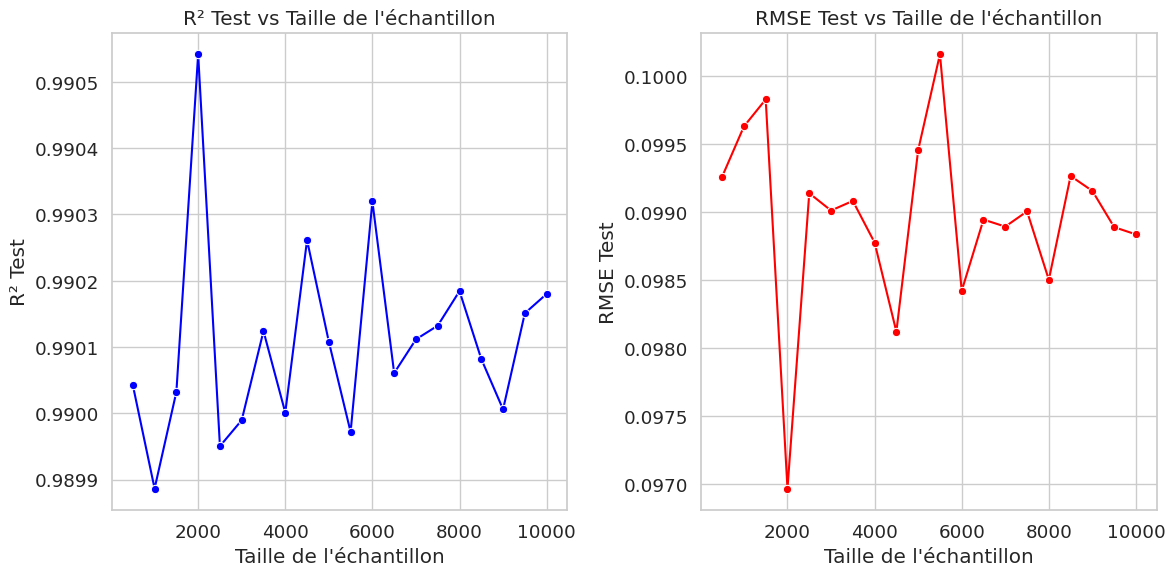

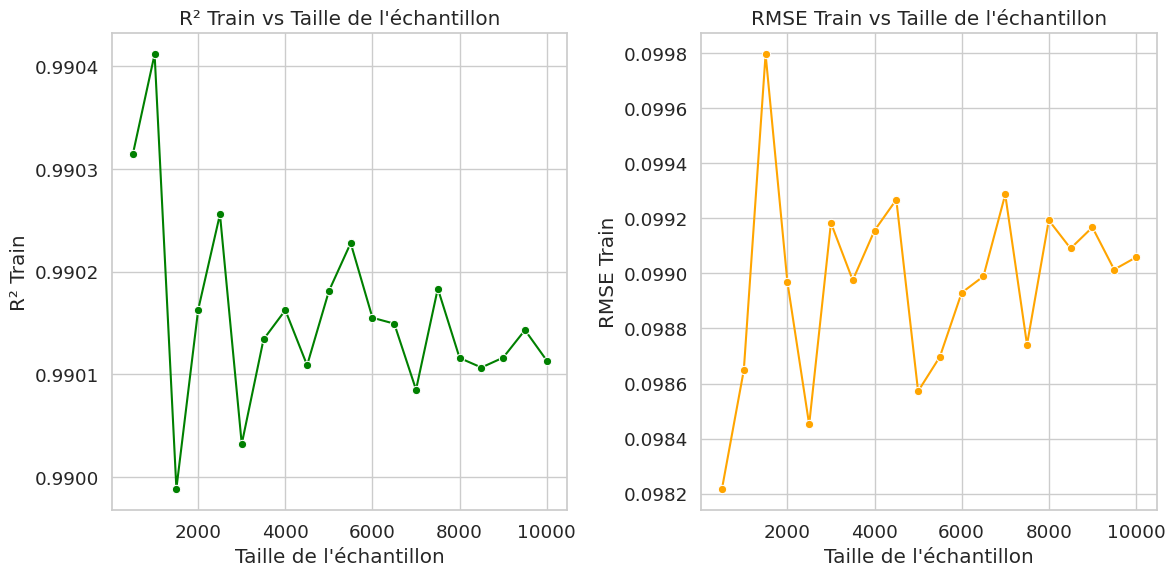

In [ ]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire pour enregistrer les résultats
results_lr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle sur les tailles d’échantillons
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)

        modelRL = LinearRegression()
        modelRL.fit(X_train, y_train)

        y_pred_test = modelRL.predict(X_test)
        y_pred_train = modelRL.predict(X_train)

        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    results_lr['sample_size'].append(size)
    results_lr['R2_test'].append(np.mean(r2_test_scores))
    results_lr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_lr['R2_train'].append(np.mean(r2_train_scores))
    results_lr['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame des résultats
df_results_lr = pd.DataFrame(results_lr)
print("Résultats moyens Régression Linéaire :")
print(df_results_lr)

# Visualisation - Image 1 : R2_test et RMSE_test
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
#plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/lr_test_scores.png", dpi=300)
plt.show()
plt.close()

# Visualisation - Image 2 : R2_train et RMSE_train
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
#plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/lr_train_scores.png", dpi=300)
plt.show()
plt.close()


**Xgboost**

Résultats moyens XGBoost Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.944469   0.233316  0.999999    0.001138
1          1000  0.965844   0.183295  0.999977    0.004765
2          1500  0.972615   0.162806  0.999914    0.009206
3          2000  0.975201   0.154616  0.999808    0.013839
4          2500  0.978976   0.143491  0.999664    0.018205
5          3000  0.981098   0.136405  0.999531    0.021594
6          3500  0.982014   0.132549  0.999373    0.024928
7          4000  0.983401   0.128083  0.999198    0.028188
8          4500  0.983958   0.126163  0.999083    0.030141
9          5000  0.984436   0.124164  0.998962    0.032106
10         5500  0.985004   0.121657  0.998809    0.034427
11         6000  0.986056   0.117183  0.998625    0.037002
12         6500  0.986481   0.115957  0.998520    0.038348
13         7000  0.986771   0.114434  0.998370    0.040194
14         7500  0.987247   0.113035  0.998275    0.041365
15         8000  0.

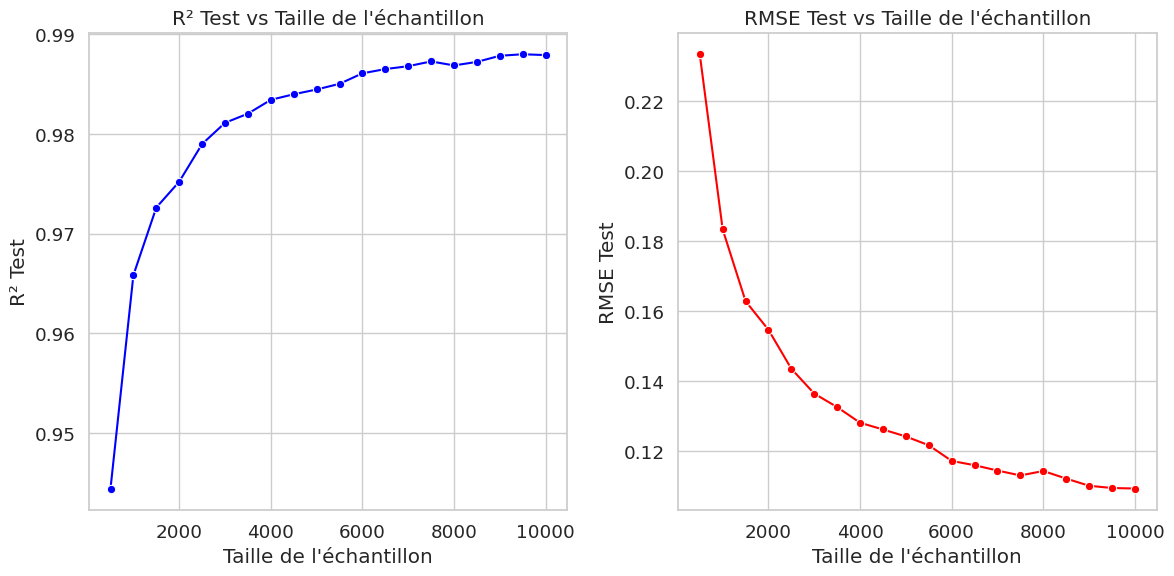

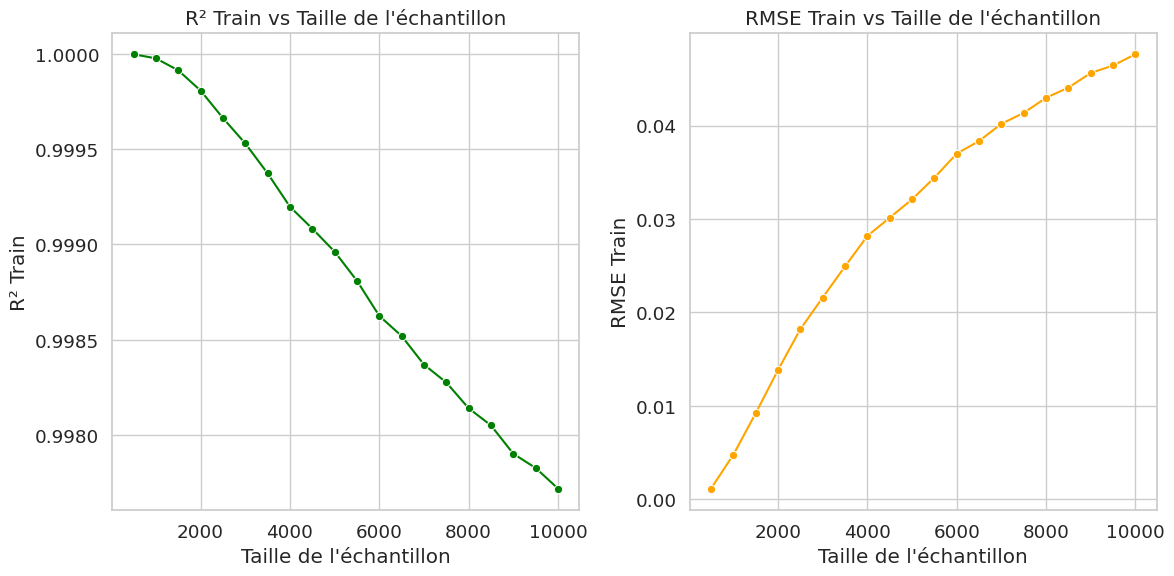

In [ ]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20
# Dictionnaire des résultats
results_xgb = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}
# Boucle d'entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []
    for _ in range(n_repeats):
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None)
        modelXGB = XGBRegressor(objective='reg:squarederror', random_state=42)
        modelXGB.fit(X_train, y_train)
        y_pred_test = modelXGB.predict(X_test)
        y_pred_train = modelXGB.predict(X_train)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    results_xgb['sample_size'].append(size)
    results_xgb['R2_test'].append(np.mean(r2_test_scores))
    results_xgb['RMSE_test'].append(np.mean(rmse_test_scores))
    results_xgb['R2_train'].append(np.mean(r2_train_scores))
    results_xgb['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_xgb = pd.DataFrame(results_xgb)
print("Résultats moyens XGBoost Regressor :")
print(df_results_xgb)

# === Image 1 : R2_test + RMSE_test ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/xgb_test_scores.png", dpi=300)
plt.show()
plt.close()

# === Image 2 : R2_train + RMSE_train ===
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/xgb_train_scores.png", dpi=300)
plt.show()
plt.close()


**Random Forest**

Résultats moyens Random Forest Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.943161   0.237095  0.991731    0.089789
1          1000  0.963185   0.191191  0.994708    0.072911
2          1500  0.971833   0.167342  0.995655    0.065703
3          2000  0.974515   0.158592  0.996210    0.061361
4          2500  0.977304   0.149112  0.996702    0.057279
5          3000  0.978770   0.144115  0.996908    0.055249
6          3500  0.980658   0.139039  0.997188    0.052797
7          4000  0.981930   0.133865  0.997317    0.051780
8          4500  0.983512   0.128238  0.997465    0.050228
9          5000  0.982773   0.130530  0.997604    0.048816
10         5500  0.983725   0.127243  0.997668    0.048223
11         6000  0.984711   0.123051  0.997743    0.047380
12         6500  0.985019   0.121271  0.997825    0.046534
13         7000  0.985542   0.120126  0.997894    0.045722
14         7500  0.985725   0.118681  0.997938    0.045357
15         80

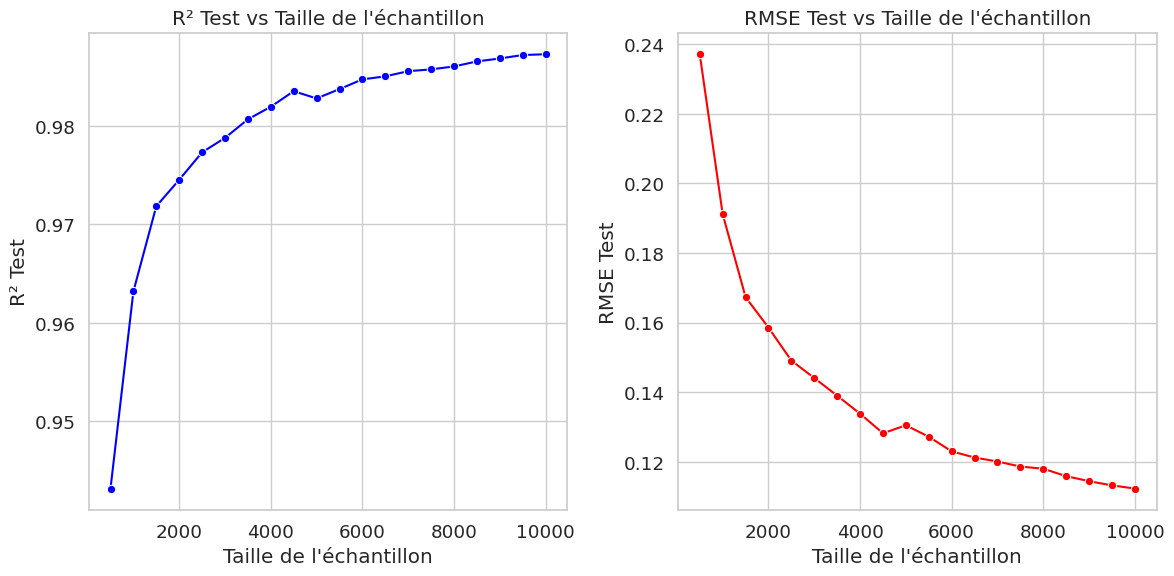

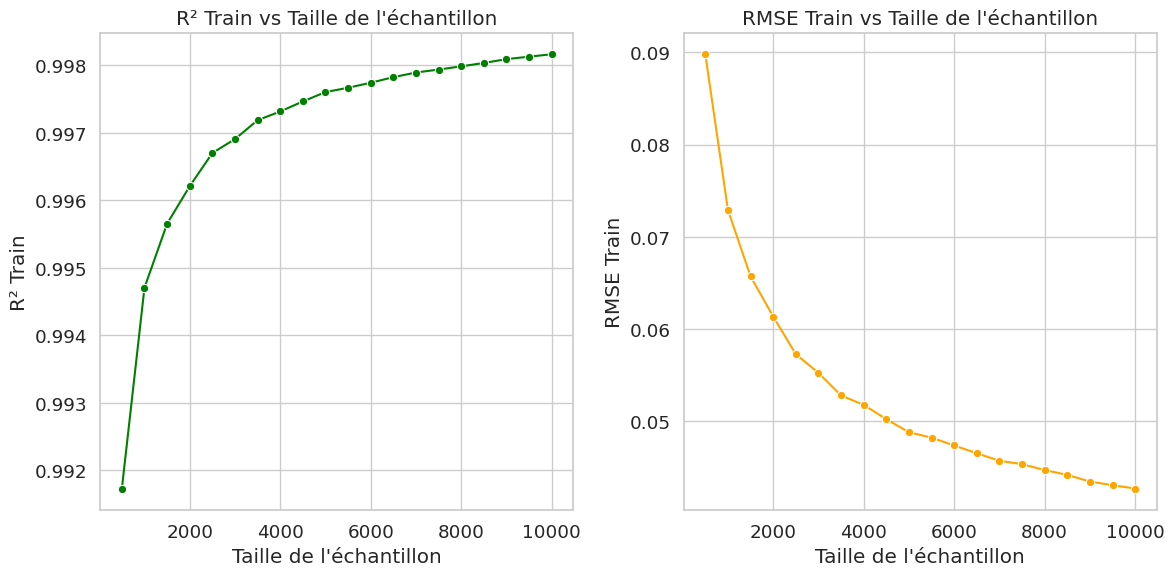

In [ ]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20
# Dictionnaire des résultats
results_rf = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}
# Boucle d’entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]
        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )
        # Modèle
        modelRF = RandomForestRegressor(random_state=42)
        modelRF.fit(X_train, y_train)
        # Prédictions test
        y_pred_test = modelRF.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        # Prédictions train
        y_pred_train = modelRF.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    # Moyenne des résultats
    results_rf['sample_size'].append(size)
    results_rf['R2_test'].append(np.mean(r2_test_scores))
    results_rf['RMSE_test'].append(np.mean(rmse_test_scores))
    results_rf['R2_train'].append(np.mean(r2_train_scores))
    results_rf['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_rf = pd.DataFrame(results_rf)
print("Résultats moyens Random Forest Regressor :")
print(df_results_rf)

#  Visualisation avec 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/rf_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/rf_train_scores.png", dpi=300)
plt.show()
plt.close()

**Arbre de décision**

Résultats moyens Decision Tree Regressor :
    sample_size   R2_test  RMSE_test  R2_train    RMSE_train
0           500  0.876442   0.341822       1.0  7.994610e-17
1          1000  0.909366   0.297051       1.0  9.559351e-17
2          1500  0.925527   0.268890       1.0  1.000132e-16
3          2000  0.926276   0.266442       1.0  1.022087e-16
4          2500  0.934221   0.255354       1.0  1.239838e-11
5          3000  0.945285   0.233140       1.0  1.121163e-16
6          3500  0.944645   0.232262       1.0  1.172842e-16
7          4000  0.948599   0.224729       1.0  1.200569e-16
8          4500  0.952564   0.217670       1.0  9.241243e-12
9          5000  0.954418   0.213198       1.0  1.226699e-16
10         5500  0.954979   0.210983       1.0  1.341889e-16
11         6000  0.955395   0.209586       1.0  1.285543e-16
12         6500  0.956349   0.207595       1.0  1.322803e-16
13         7000  0.958546   0.202240       1.0  1.319225e-16
14         7500  0.960219   0.198791      

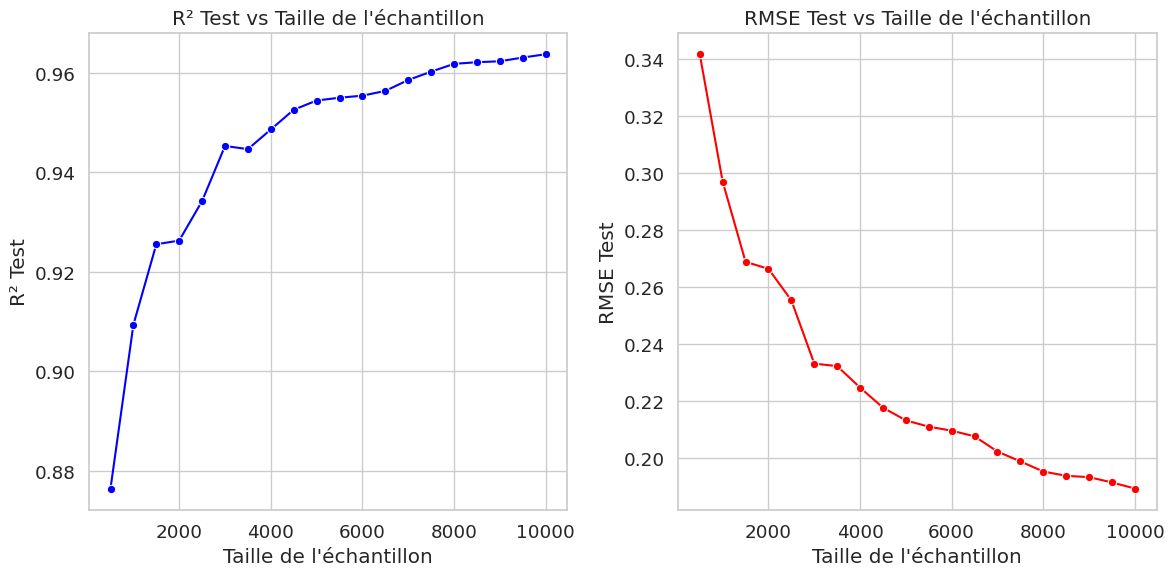

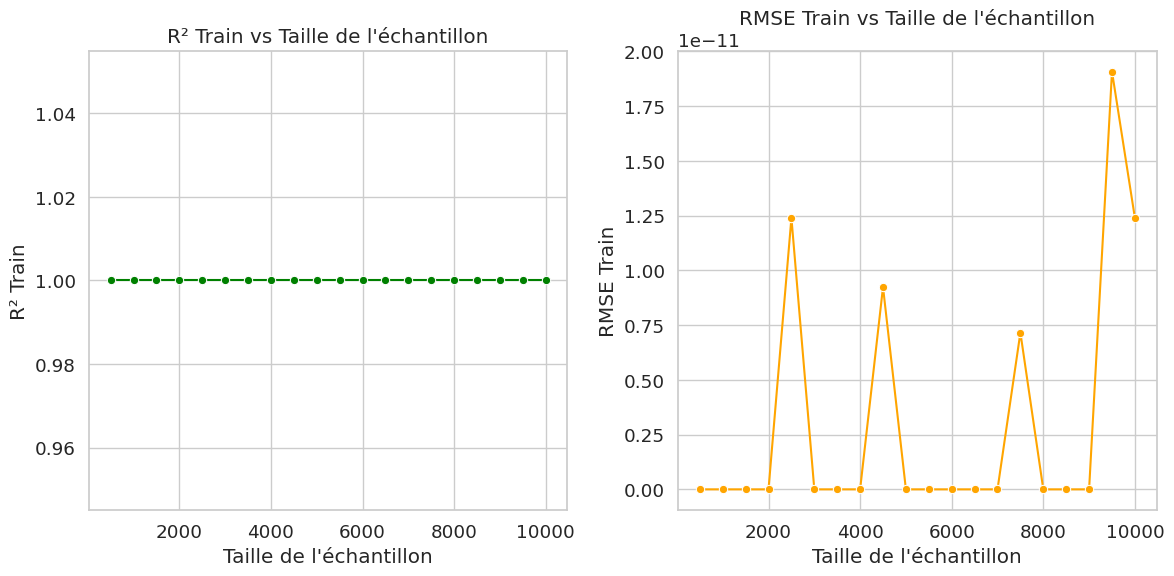

In [ ]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_tree = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle
        model_tree = DecisionTreeRegressor(random_state=42)
        model_tree.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = model_tree.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = model_tree.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_tree['sample_size'].append(size)
    results_tree['R2_test'].append(np.mean(r2_test_scores))
    results_tree['RMSE_test'].append(np.mean(rmse_test_scores))
    results_tree['R2_train'].append(np.mean(r2_train_scores))
    results_tree['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_tree = pd.DataFrame(results_tree)
print("Résultats moyens Decision Tree Regressor :")
print(df_results_tree)

#  Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/tree_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/tree_train_scores.png", dpi=300)
plt.show()
plt.close()

**SVR**

Résultats moyens Support Vector Regression :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.988416   0.104864  0.991481    0.090838
1          1000  0.990911   0.094207  0.992816    0.084588
2          1500  0.992022   0.088974  0.993344    0.081200
3          2000  0.992899   0.083771  0.993728    0.078661
4          2500  0.993069   0.082255  0.994063    0.076793
5          3000  0.993684   0.079528  0.994195    0.075934
6          3500  0.993607   0.079416  0.994335    0.075059
7          4000  0.994077   0.076730  0.994528    0.073690
8          4500  0.994197   0.075805  0.994675    0.072744
9          5000  0.994092   0.076646  0.994683    0.072389
10         5500  0.994430   0.074773  0.994814    0.071832
11         6000  0.994482   0.073998  0.994936    0.071012
12         6500  0.994512   0.073859  0.995025    0.070353
13         7000  0.994824   0.071728  0.995040    0.070187
14         7500  0.994736   0.072186  0.995127    0.069583
15         

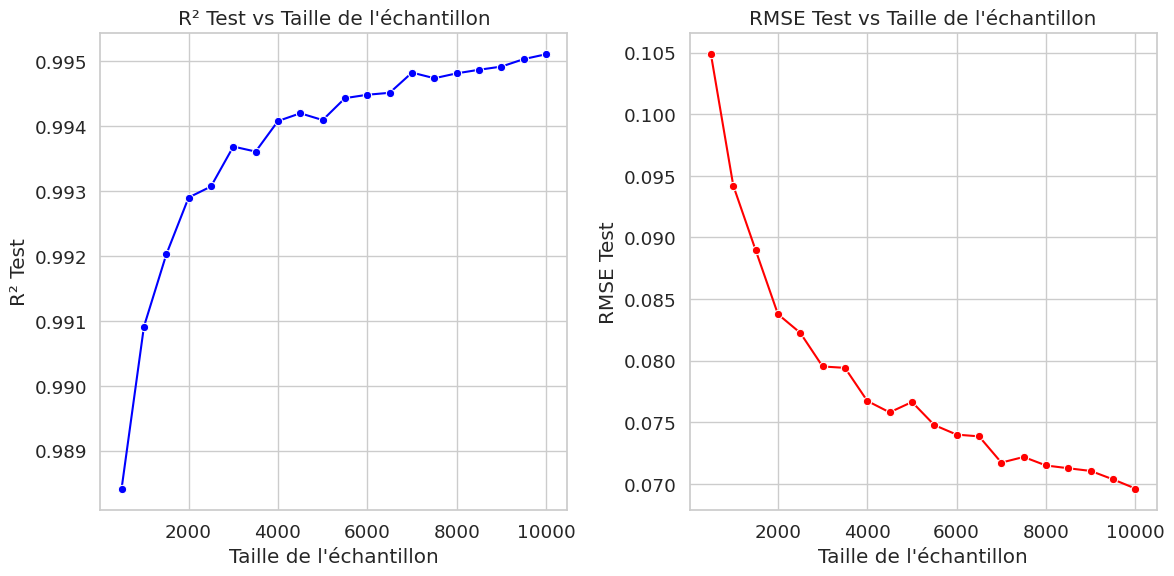

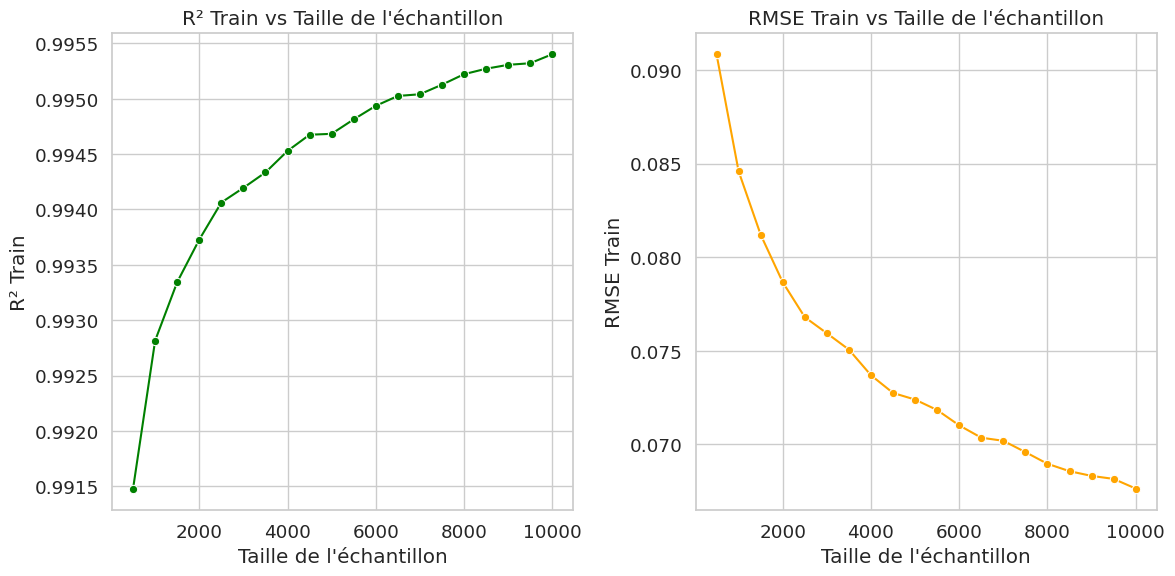

In [ ]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_svr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle SVR
        modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
        modelSVR.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelSVR.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelSVR.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_svr['sample_size'].append(size)
    results_svr['R2_test'].append(np.mean(r2_test_scores))
    results_svr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_svr['R2_train'].append(np.mean(r2_train_scores))
    results_svr['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_svr = pd.DataFrame(results_svr)
print("Résultats moyens Support Vector Regression :")
print(df_results_svr)

#  Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/svr_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/svr_train_scores.png", dpi=300)
plt.show()
plt.close()

In [ ]:
model_results = [
    ('LinearRegression', df_results_lr),
    ('RandomForest', df_results_rf),
    ('XGBoost', df_results_xgb),
    ('DecisionTree', df_results_tree),
    ('SVR', df_results_svr),
]

# Initialisation des résultats comparatifs
comparison = []

# Pour chaque taille d’échantillon
sample_sizes = df_results_xgb['sample_size'].unique()

for size in sample_sizes:
    best_r2_test, best_r2_train = -float('inf'), -float('inf')
    best_rmse_test, best_rmse_train = float('inf'), float('inf')
    best_model_r2_test = best_model_r2_train = ''
    best_model_rmse_test = best_model_rmse_train = ''

    for model_name, df in model_results:
        row = df[df['sample_size'] == size]
        if not row.empty:
            r2_test = row['R2_test'].values[0]
            rmse_test = row['RMSE_test'].values[0]
            r2_train = row['R2_train'].values[0]
            rmse_train = row['RMSE_train'].values[0]

            if r2_test > best_r2_test:
                best_r2_test = r2_test
                best_model_r2_test = model_name

            if rmse_test < best_rmse_test:
                best_rmse_test = rmse_test
                best_model_rmse_test = model_name

            if r2_train > best_r2_train:
                best_r2_train = r2_train
                best_model_r2_train = model_name

            if rmse_train < best_rmse_train:
                best_rmse_train = rmse_train
                best_model_rmse_train = model_name

    # Ajout au tableau comparatif
    comparison.append({
        'sample_size': size,
        'Best_R2_test': best_r2_test,
        'Model_R2_test': best_model_r2_test,
        'Best_RMSE_test': best_rmse_test,
        'Model_RMSE_test': best_model_rmse_test,
        'Best_R2_train': best_r2_train,
        'Model_R2_train': best_model_r2_train,
        'Best_RMSE_train': best_rmse_train,
        'Model_RMSE_train': best_model_rmse_train
    })

# Conversion en DataFrame
df_comparison = pd.DataFrame(comparison)

# Affichage du tableau comparatif
print(" Meilleurs modèles par taille d’échantillon :")
print(df_comparison)

# Sauvegarde optionnelle
print("Tableau sauvegardé")
df_comparison.to_csv("/gdrive/MyDrive/Dossier TNT/Comparaison_meilleurs_modeles.csv", index=False)


 Meilleurs modèles par taille d’échantillon :
    sample_size  Best_R2_test     Model_R2_test  Best_RMSE_test  \
0           500      0.989018  LinearRegression        0.102059   
1          1000      0.990911               SVR        0.094207   
2          1500      0.992022               SVR        0.088974   
3          2000      0.992899               SVR        0.083771   
4          2500      0.993069               SVR        0.082255   
5          3000      0.993684               SVR        0.079528   
6          3500      0.993607               SVR        0.079416   
7          4000      0.994077               SVR        0.076730   
8          4500      0.994197               SVR        0.075805   
9          5000      0.994092               SVR        0.076646   
10         5500      0.994430               SVR        0.074773   
11         6000      0.994482               SVR        0.073998   
12         6500      0.994512               SVR        0.073859   
13         7000 

=== Performances SVR ===
R² Train : 0.9957
RMSE Train : 0.0656
R² Test : 0.9957
RMSE Test : 0.0661


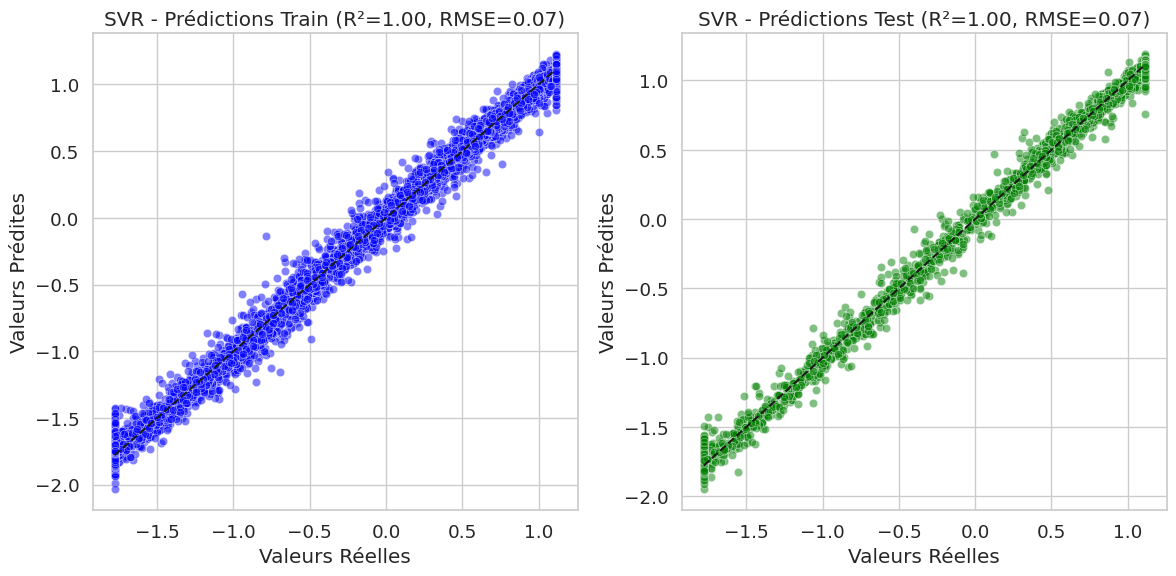

In [ ]:
# Chargement des données
df_train = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_train.csv")
df_test = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_test.csv")

# Séparation variables (X) et cible (y)
X_train = df_train.drop(columns=["E_field"])
y_train = df_train["E_field"]

X_test = df_test.drop(columns=["E_field"])
y_test = df_test["E_field"]


 # Modèle
modelRF = RandomForestRegressor(random_state=42)
modelRF.fit(X_train, y_train)

# Prédictions test
y_pred_test = modelRF.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prédictions train
y_pred_train = modelRF.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Résultats
print("=== Performances SVR ===")
print(f"R² Train : {r2_train:.4f}")
print(f"RMSE Train : {rmse_train:.4f}")
print(f"R² Test : {r2_test:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

# Visualisations
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Scatter plot Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title(f"Random Forest - Prédictions Train (R²={r2_train:.2f}, RMSE={rmse_train:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

# Scatter plot Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f"Random Forest - Prédictions Test (R²={r2_test:.2f}, RMSE={rmse_test:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/svr_donnee_test.png", dpi=300)
plt.show()


In [ ]:
# === CLASSEMENT DES MODÈLES POUR CHAQUE MÉTRIQUE ===

rankings = []

for size in sample_sizes:
    ranking_entry = {'sample_size': size}

    # Pour chaque métrique et type de données
    for metric in ['R2_test', 'RMSE_test']:
        scores = []
        for model_name, df in model_results:
            value = df[df['sample_size'] == size][metric].values[0]
            scores.append((model_name, value))

        # Pour R² → tri décroissant (plus c’est haut, mieux c’est)
        if 'R2' in metric:
            scores.sort(key=lambda x: x[1], reverse=True)
        # Pour RMSE → tri croissant (plus c’est bas, mieux c’est)
        else:
            scores.sort(key=lambda x: x[1])

        # Enregistrement des classements
        for rank, (model, score) in enumerate(scores, start=1):
            ranking_entry[f'{metric}_rank_{rank}'] = model

    rankings.append(ranking_entry)

# Conversion en DataFrame
df_rankings = pd.DataFrame(rankings)

# Affichage du classement
print("\n Classement des modèles (par métrique et taille d’échantillon) :")
print(df_rankings)

# Sauvegarde optionnelle
df_rankings.to_csv("/gdrive/MyDrive/Dossier TNT/Classement_modeles_par_metrique.csv", index=False)
print(" Classement sauvegardé.")



 Classement des modèles (par métrique et taille d’échantillon) :
    sample_size    R2_test_rank_1    R2_test_rank_2 R2_test_rank_3  \
0           500  LinearRegression               SVR        XGBoost   
1          1000               SVR  LinearRegression        XGBoost   
2          1500               SVR  LinearRegression        XGBoost   
3          2000               SVR  LinearRegression        XGBoost   
4          2500               SVR  LinearRegression        XGBoost   
5          3000               SVR  LinearRegression        XGBoost   
6          3500               SVR  LinearRegression        XGBoost   
7          4000               SVR  LinearRegression        XGBoost   
8          4500               SVR  LinearRegression        XGBoost   
9          5000               SVR  LinearRegression        XGBoost   
10         5500               SVR  LinearRegression        XGBoost   
11         6000               SVR  LinearRegression        XGBoost   
12         6500         

**RANDOM FOREST**

=== Performances SVR ===
R² Train : 0.9983
RMSE Train : 0.0406
R² Test : 0.9881
RMSE Test : 0.1104


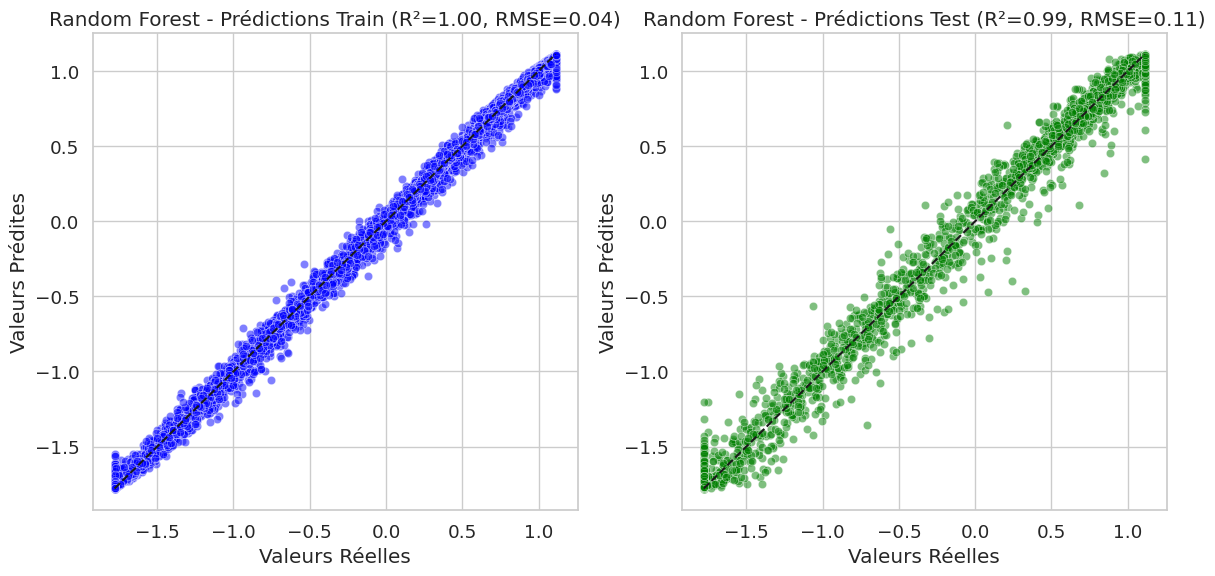

In [ ]:
# Chargement des données
df_train = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_train.csv")
df_test = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_test.csv")

# Séparation variables (X) et cible (y)
X_train = df_train.drop(columns=["E_field"])
y_train = df_train["E_field"]

X_test = df_test.drop(columns=["E_field"])
y_test = df_test["E_field"]


 # Modèle
modelRF = RandomForestRegressor(random_state=42)
modelRF.fit(X_train, y_train)

# Prédictions test
y_pred_test = modelRF.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prédictions train
y_pred_train = modelRF.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Résultats
print("=== Performances SVR ===")
print(f"R² Train : {r2_train:.4f}")
print(f"RMSE Train : {rmse_train:.4f}")
print(f"R² Test : {r2_test:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

# Visualisations
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Scatter plot Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title(f"Random Forest - Prédictions Train (R²={r2_train:.2f}, RMSE={rmse_train:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

# Scatter plot Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f"Random Forest - Prédictions Test (R²={r2_test:.2f}, RMSE={rmse_test:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/random_forest_donnee_test.png", dpi=300)
plt.show()

=== Performances Random Forest (valeurs réelles) ===
R² Train : 0.9983
RMSE Train : 0.9189
R² Test : 0.9881
RMSE Test : 2.4985


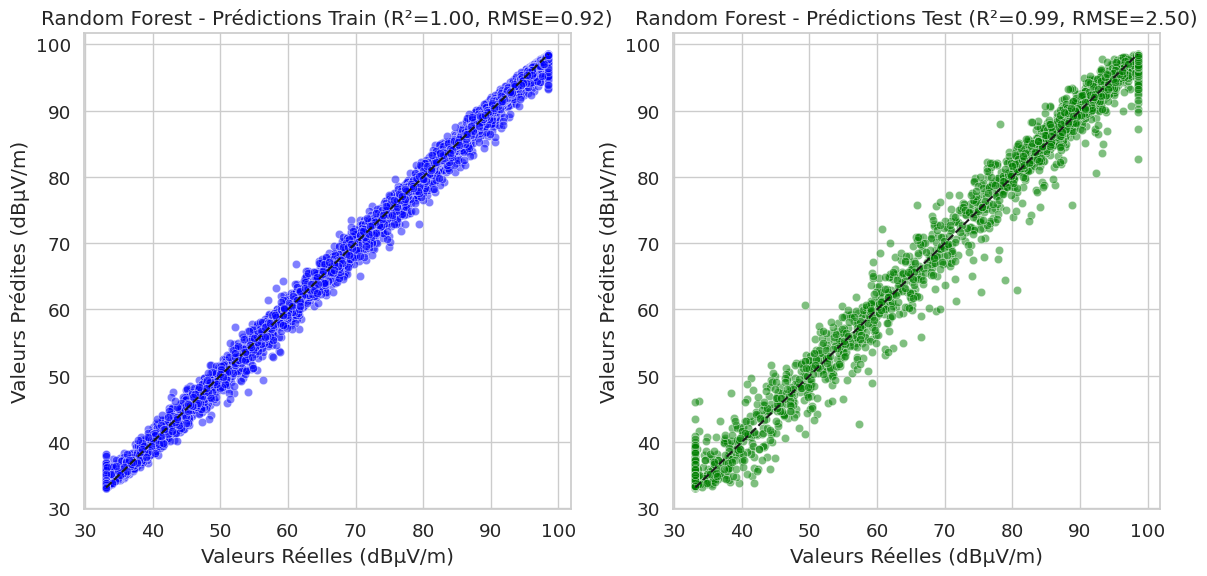

In [ ]:

# Paramètres de standardisation de E_field
mu_E = 73.38295455
sigma_E = 22.627417

# Chargement des données standardisées
df_train = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_train.csv")
df_test = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_test.csv")

# Séparation variables (X) et cible (y)
X_train = df_train.drop(columns=["E_field"])
y_train_std = df_train["E_field"]  # E_field standardisé

X_test = df_test.drop(columns=["E_field"])
y_test_std = df_test["E_field"]  # E_field standardisé

# Modèle
modelRF = RandomForestRegressor(random_state=42)
modelRF.fit(X_train, y_train_std)

# Prédictions sur jeu de test
y_pred_test_std = modelRF.predict(X_test)
y_pred_test = y_pred_test_std * sigma_E + mu_E
y_test = y_test_std * sigma_E + mu_E

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prédictions sur jeu d'entraînement
y_pred_train_std = modelRF.predict(X_train)
y_pred_train = y_pred_train_std * sigma_E + mu_E
y_train = y_train_std * sigma_E + mu_E

r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Résultats
print("=== Performances Random Forest (valeurs réelles) ===")
print(f"R² Train : {r2_train:.4f}")
print(f"RMSE Train : {rmse_train:.4f}")
print(f"R² Test : {r2_test:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

# Visualisations
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Scatter plot Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title(f"Random Forest - Prédictions Train (R²={r2_train:.2f}, RMSE={rmse_train:.2f})")
plt.xlabel("Valeurs Réelles (dBµV/m)")
plt.ylabel("Valeurs Prédites (dBµV/m)")
plt.grid(True)

# Scatter plot Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f"Random Forest - Prédictions Test (R²={r2_test:.2f}, RMSE={rmse_test:.2f})")
plt.xlabel("Valeurs Réelles (dBµV/m)")
plt.ylabel("Valeurs Prédites (dBµV/m)")
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/rf_donnee_test_reelles.png", dpi=300)
plt.show()


=== Performances XGBoost (valeurs réelles) ===
R² Train : 0.9971
RMSE Train : 1.2121
R² Test : 0.9889
RMSE Test : 2.4127


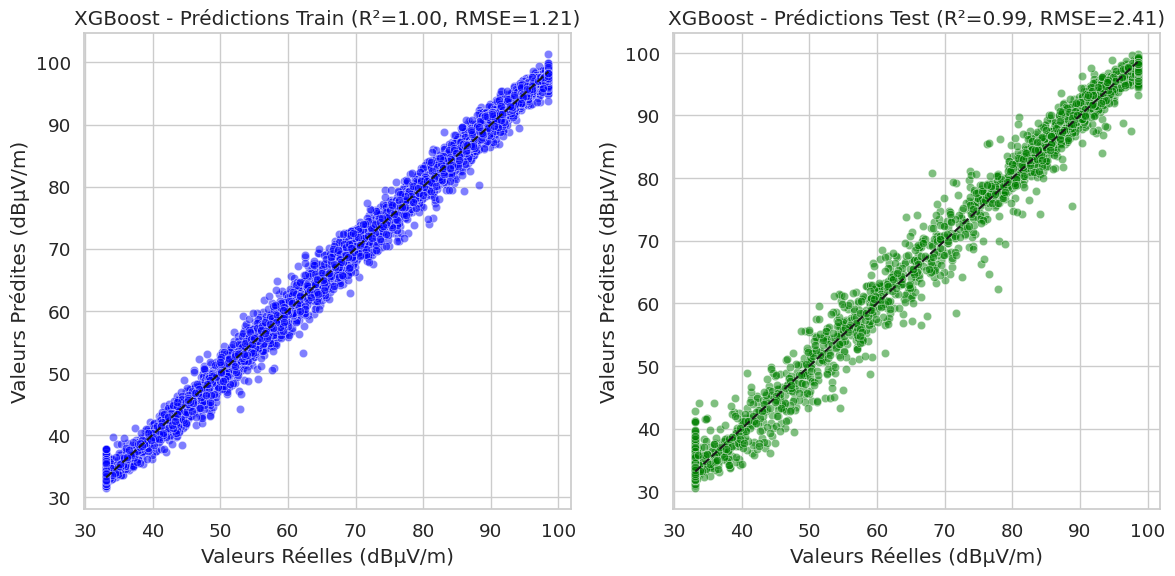

In [ ]:
# Paramètres de standardisation de E_field
mu_E = 73.38295455
sigma_E = 22.627417

# Chargement des données standardisées
df_train = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_train.csv")
df_test = pd.read_csv("/gdrive/MyDrive/Dossier TNT/Donnees_test.csv")

# Séparation variables (X) et cible (y)
X_train = df_train.drop(columns=["E_field"])
y_train_std = df_train["E_field"]

X_test = df_test.drop(columns=["E_field"])
y_test_std = df_test["E_field"]

# Modèle XGBoost
modelXGB = XGBRegressor(random_state=42, n_jobs=-1)
modelXGB.fit(X_train, y_train_std)

# Prédictions test
y_pred_test_std = modelXGB.predict(X_test)
y_pred_test = y_pred_test_std * sigma_E + mu_E
y_test = y_test_std * sigma_E + mu_E

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Prédictions train
y_pred_train_std = modelXGB.predict(X_train)
y_pred_train = y_pred_train_std * sigma_E + mu_E
y_train = y_train_std * sigma_E + mu_E

r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Résultats
print("=== Performances XGBoost (valeurs réelles) ===")
print(f"R² Train : {r2_train:.4f}")
print(f"RMSE Train : {rmse_train:.4f}")
print(f"R² Test : {r2_test:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

# Visualisations
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Scatter plot Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title(f"XGBoost - Prédictions Train (R²={r2_train:.2f}, RMSE={rmse_train:.2f})")
plt.xlabel("Valeurs Réelles (dBµV/m)")
plt.ylabel("Valeurs Prédites (dBµV/m)")
plt.grid(True)

# Scatter plot Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f"XGBoost - Prédictions Test (R²={r2_test:.2f}, RMSE={rmse_test:.2f})")
plt.xlabel("Valeurs Réelles (dBµV/m)")
plt.ylabel("Valeurs Prédites (dBµV/m)")
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images TNT/Images Pré-Traitement/xgboost_donnee_test_reelles.png", dpi=300)
plt.show()
